In [401]:
import requests as call

In [428]:
url = 'https://api.covid19api.com/dayone/country/brazil'
#api data conection
response = call.get(url)

#api validation status
response.status_code

200

In [429]:
#api data
baseData = response.json()
baseData[0]

{'ID': '63aa488e-b4a2-4fcd-ae15-07c1ff219903',
 'Country': 'Brazil',
 'CountryCode': 'BR',
 'Province': '',
 'City': '',
 'CityCode': '',
 'Lat': '-14.24',
 'Lon': '-51.93',
 'Confirmed': 1,
 'Deaths': 0,
 'Recovered': 0,
 'Active': 1,
 'Date': '2020-02-26T00:00:00Z'}

In [430]:
#new list ,to index each row from api data 
cleanBase = []
for row in baseData:
    cleanBase.append([row['Confirmed'], row['Deaths'], row['Recovered'], row['Active'], row['Date']])

In [431]:
#columns title added to the new list, now it can be parsed as a csv file
cleanBase.insert(0, ['CONFIRMED', 'DEATHS', 'RECOVERED', 'ACTIVE', 'DATE',])
cleanBase

[['CONFIRMED', 'DEATHS', 'RECOVERED', 'ACTIVE', 'DATE'],
 [1, 0, 0, 1, '2020-02-26T00:00:00Z'],
 [1, 0, 0, 1, '2020-02-27T00:00:00Z'],
 [1, 0, 0, 1, '2020-02-28T00:00:00Z'],
 [2, 0, 0, 2, '2020-02-29T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-01T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-02T00:00:00Z'],
 [2, 0, 0, 2, '2020-03-03T00:00:00Z'],
 [4, 0, 0, 4, '2020-03-04T00:00:00Z'],
 [4, 0, 0, 4, '2020-03-05T00:00:00Z'],
 [13, 0, 0, 13, '2020-03-06T00:00:00Z'],
 [13, 0, 0, 13, '2020-03-07T00:00:00Z'],
 [20, 0, 0, 20, '2020-03-08T00:00:00Z'],
 [25, 0, 0, 25, '2020-03-09T00:00:00Z'],
 [31, 0, 0, 31, '2020-03-10T00:00:00Z'],
 [38, 0, 0, 38, '2020-03-11T00:00:00Z'],
 [52, 0, 0, 52, '2020-03-12T00:00:00Z'],
 [151, 0, 0, 151, '2020-03-13T00:00:00Z'],
 [151, 0, 0, 151, '2020-03-14T00:00:00Z'],
 [162, 0, 0, 162, '2020-03-15T00:00:00Z'],
 [200, 0, 1, 199, '2020-03-16T00:00:00Z'],
 [321, 1, 2, 318, '2020-03-17T00:00:00Z'],
 [372, 3, 2, 367, '2020-03-18T00:00:00Z'],
 [621, 6, 2, 613, '2020-03-19T00:00:00Z'],
 [79

In [432]:
#formating string, from attribute in index 4. Using first 10 digits
for i in range(1, len(cleanBase)):
    cleanBase[i][4] = cleanBase[i][4][:10]
cleanBase

[['CONFIRMED', 'DEATHS', 'RECOVERED', 'ACTIVE', 'DATE'],
 [1, 0, 0, 1, '2020-02-26'],
 [1, 0, 0, 1, '2020-02-27'],
 [1, 0, 0, 1, '2020-02-28'],
 [2, 0, 0, 2, '2020-02-29'],
 [2, 0, 0, 2, '2020-03-01'],
 [2, 0, 0, 2, '2020-03-02'],
 [2, 0, 0, 2, '2020-03-03'],
 [4, 0, 0, 4, '2020-03-04'],
 [4, 0, 0, 4, '2020-03-05'],
 [13, 0, 0, 13, '2020-03-06'],
 [13, 0, 0, 13, '2020-03-07'],
 [20, 0, 0, 20, '2020-03-08'],
 [25, 0, 0, 25, '2020-03-09'],
 [31, 0, 0, 31, '2020-03-10'],
 [38, 0, 0, 38, '2020-03-11'],
 [52, 0, 0, 52, '2020-03-12'],
 [151, 0, 0, 151, '2020-03-13'],
 [151, 0, 0, 151, '2020-03-14'],
 [162, 0, 0, 162, '2020-03-15'],
 [200, 0, 1, 199, '2020-03-16'],
 [321, 1, 2, 318, '2020-03-17'],
 [372, 3, 2, 367, '2020-03-18'],
 [621, 6, 2, 613, '2020-03-19'],
 [793, 11, 2, 780, '2020-03-20'],
 [1021, 15, 2, 1004, '2020-03-21'],
 [1546, 25, 2, 1519, '2020-03-22'],
 [1924, 34, 2, 1888, '2020-03-23'],
 [2247, 46, 2, 2199, '2020-03-24'],
 [2554, 59, 2, 2493, '2020-03-25'],
 [2985, 77, 6, 2902,

In [407]:
import csv

In [433]:
#creating DS csv

with open('COVIDBrazil.csv', 'w') as file:
    writer = csv.writer(file)
    writer.writerows(cleanBase)

In [434]:
#attribute in index 4 get itself, converted as datetime

import datetime as dt

for i in range(1, len(cleanBase)):
    cleanBase[i][4] = dt.datetime.strptime(cleanBase[i][4], '%Y-%m-%d')
cleanBase

[['CONFIRMED', 'DEATHS', 'RECOVERED', 'ACTIVE', 'DATE'],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 26, 0, 0)],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 27, 0, 0)],
 [1, 0, 0, 1, datetime.datetime(2020, 2, 28, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 2, 29, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 1, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 2, 0, 0)],
 [2, 0, 0, 2, datetime.datetime(2020, 3, 3, 0, 0)],
 [4, 0, 0, 4, datetime.datetime(2020, 3, 4, 0, 0)],
 [4, 0, 0, 4, datetime.datetime(2020, 3, 5, 0, 0)],
 [13, 0, 0, 13, datetime.datetime(2020, 3, 6, 0, 0)],
 [13, 0, 0, 13, datetime.datetime(2020, 3, 7, 0, 0)],
 [20, 0, 0, 20, datetime.datetime(2020, 3, 8, 0, 0)],
 [25, 0, 0, 25, datetime.datetime(2020, 3, 9, 0, 0)],
 [31, 0, 0, 31, datetime.datetime(2020, 3, 10, 0, 0)],
 [38, 0, 0, 38, datetime.datetime(2020, 3, 11, 0, 0)],
 [52, 0, 0, 52, datetime.datetime(2020, 3, 12, 0, 0)],
 [151, 0, 0, 151, datetime.datetime(2020, 3, 13, 0, 0)],
 [151, 0, 0, 151, datetime.dateti

In [435]:
def defineDS(y, labels):
    if type(y[0]) == list:
        ds = []
        for i in range(len(y)):
            ds.append({
                'label': labels[i],
                'data': y[i]
            })
        return ds
    else:
        return[
            {
                'label': labels[0],
                'data': y
            }
        ]

In [458]:
def titleConfig(t=''):
    if t != '':
        disp = 'true'
    else:
        disp = 'false'
    return{
        'title': t,
        'display': disp
    }

In [459]:
def chartConfig(x, y, labels, kind='bar', t=''):

    ds = get_datasets(y, labels)
    options = titleConfig(t)
    
    chart = {
        'type': kind,
        'data':{
            'labels': x,
            'datasets': ds
        },
        'options': options
    }
    return chart

In [460]:
def chartAPI(chart):
    baseURL = 'https://quickchart.io/chart'
    response1 = call.get(f'{baseURL}?c={str(chart)}')
    return response1.content

In [461]:
def pngSave(local, info):
    with open(local, 'wb') as image:
        image.write(info)

In [462]:
from PIL import Image
from IPython.display import display

In [463]:
def showChart(local):
    imgPIL = Image.open(local)
    display(imgPIL)

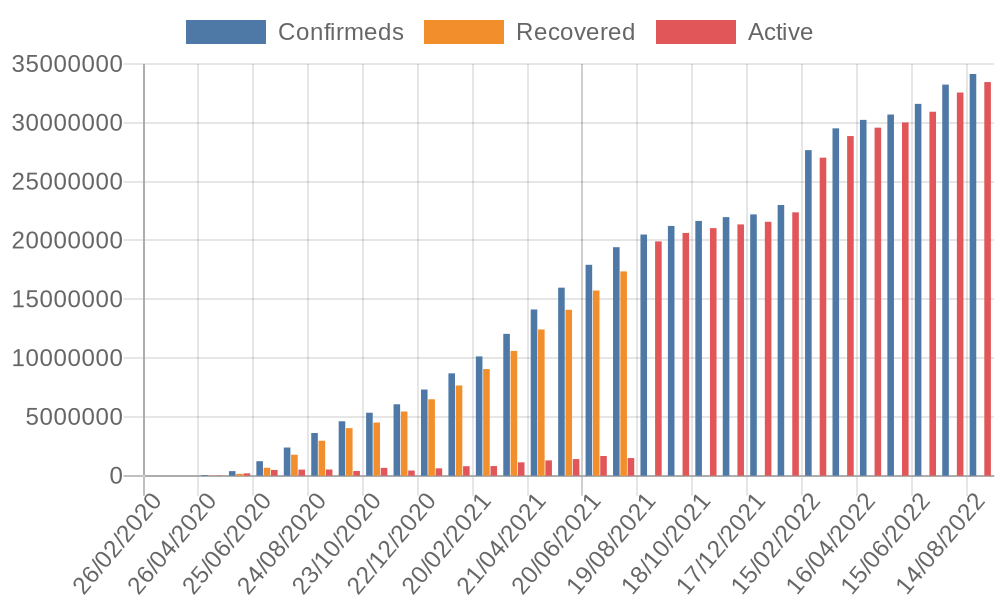

In [464]:
yAxesI = []
for row in final_data[1::30]:
    yAxesI.append(row[0])

yAxesII = []
for row in final_data[1::30]:
    yAxesII.append(row[2])

yAxesIII = []
for row in final_data[1::30]:
    yAxesIII.append(row[3])
    
labels = ['Confirmeds', 'Recovered', 'Active']

x = []
for obs in final_data[1::30]:
    x.append(obs[4].strftime('%d/%m/%Y'))
    
chart = chartConfig(x, [yAxesI, yAxesII, yAxesIII], labels, t='Confirmeds x Recovered')
chartInfo = chartAPI(chart)
pngSave('CovidBrazil.png', chartInfo)
showChart('CovidBrazil.png')